In [19]:
#importamos las librerias necesarias
import pandas as pd
import geopandas as gpd
#imprtamos el objeto Punto de la libreria shapely.geometry
from shapely.geometry import Point

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#consultamos como funciona la funcion Point
Point?

In [8]:
#creamos los dos puntos a partir de coordenadas de google maps 
#tenemos que invertirlo de acuerdo como lo pone googlemaps ya que lat es x y long es y,
#google pone las coordenadas en latlong, es decir yx y Point lo toma como xy
obelisco = Point(-58.381743,-34.603736)
cero = Point(-58.4627,-34.6297166)

In [10]:
#podemos usar la funcion distance para ver si fueron cargados como objetos espaciales
cero.distance(obelisco)

0.08502368743685419

In [13]:
#creamos un pandas data frame de cero utilizando un diccionario
dt = pd.DataFrame({'nombre':['cero','obelisco'],
                  'geometry':[cero,obelisco]})
dt

,nombre,geometry
0,cero,POINT (-58.4627 -34.6297166)
1,obelisco,POINT (-58.381743 -34.603736)


In [14]:
#vemos que el tipo es incorrecto, no es un GeoPandas GeoDataFrame
type(dt)

pandas.core.frame.DataFrame

In [16]:
#lo convertimos en GeoDataFrame indicando que columnas almacena los objetos geograficos
#y en queproyeccion estaban originalmente
gdt = gpd.GeoDataFrame(dt, geometry='geometry',crs={'init' :'epsg:4326'})
gdt

,nombre,geometry
0,cero,POINT (-58.4627 -34.6297166)
1,obelisco,POINT (-58.381743 -34.603736)


In [17]:
#chequeamos el tipo
type(gdt)


geopandas.geodataframe.GeoDataFrame

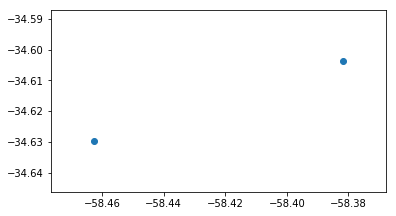

In [21]:
#o mejor, lo visualizamos
gdt.plot()

In [22]:
#si queremos obtener la distancia en metros debemos transormar la proyeccion a una en metros
gdt = gdt.to_crs(epsg =3857)
gdt

,nombre,geometry
0,cero,POINT (-6508037.994399916 -4113674.272713711)
1,obelisco,POINT (-6499025.902383764 -4110159.994877404)


In [23]:
#buscamos el primer  elemento dentro de la serie geometry para calcular la distancia co el otro 
gdt.geometry.iloc[0].distance(gdt.geometry.iloc[1])

9673.0528386

In [24]:
#guardamos el archivo para visualizarlo en QGIS u otro software
gdt.to_file('../carto/gdt')